## Regression

In [2]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline
import statsmodels.api as sm
from patsy import dmatrices

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
guerry = pd.read_csv('/Users/meganchen/Desktop/MIS_381/dataset/Guerry.csv', index_col=0).dropna()
guerry[:5]

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
1,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
2,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
3,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
4,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
5,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10


In [3]:
guerry = guerry[['Department', 'Lottery', 'Literacy', 'Wealth', 'Region']]
guerry[:5]

,Department,Lottery,Literacy,Wealth,Region
1,Ain,41,37,73,E
2,Aisne,38,51,22,N
3,Allier,66,13,61,C
4,Basses-Alpes,80,46,76,E
5,Hautes-Alpes,79,69,83,E


In [4]:
y, X = dmatrices('Lottery ~ Literacy', data=guerry, return_type='dataframe')

In [5]:
y[:3]

,Lottery
1,41.0
2,38.0
3,66.0


In [6]:
X[:3]

,Intercept,Literacy
1,1.0,37.0
2,1.0,51.0
3,1.0,13.0


In [7]:
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     14.16
Date:                Wed, 16 Aug 2017   Prob (F-statistic):           0.000312
Time:                        14:06:46   Log-Likelihood:                -386.13
No. Observations:                  85   AIC:                             776.3
Df Residuals:                      83   BIC:                             781.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.2389      6.163     10.423      0.0

In [8]:
result.params

Intercept    64.238948
Literacy     -0.541722
dtype: float64

In [9]:
result.rsquared

0.14572061293737237

In [10]:
result.pvalues

Intercept    9.514472e-17
Literacy     3.123617e-04
dtype: float64

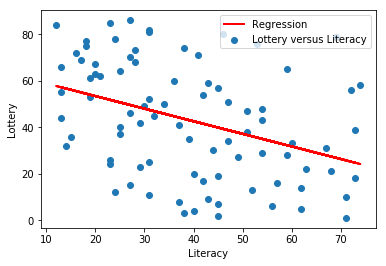

In [11]:
x = guerry['Literacy']
y_actual = guerry['Lottery']
y_expected = result.params['Intercept'] + result.params['Literacy'] * x

scatter(x=x, y=y_actual, label='Lottery versus Literacy')
plot(x, y_expected, color='red', linewidth=2, label='Regression')
xlabel('Literacy')
ylabel('Lottery')
legend(loc='best')

In [12]:
y, X = dmatrices('Lottery ~ Wealth', data=guerry, return_type='dataframe')
model = sm.OLS(y, X) 
result = model.fit()
print 'Params'
print result.params
print
print 'R-squared =', result.rsquared
print
print 'p-values'
print result.pvalues

Params
Intercept    21.860207
Wealth        0.485929
dtype: float64

R-squared = 0.243180384656

p-values
Intercept    0.000014
Wealth       0.000002
dtype: float64


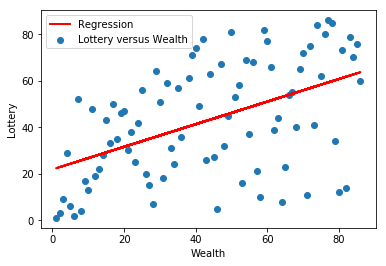

In [13]:
x = guerry['Wealth']
y_actual = guerry['Lottery']
y_expected = result.params['Intercept'] + result.params['Wealth'] * x

scatter(x=x, y=y_actual, label='Lottery versus Wealth')
plot(x, y_expected, color='red', linewidth=2, label='Regression')
xlabel('Wealth')
ylabel('Lottery')
legend(loc='best')

In [21]:
y, X = dmatrices('Lottery ~ Literacy + Wealth', data=guerry, return_type='dataframe')
y[:3]

,Lottery
1,41.0
2,38.0
3,66.0


In [16]:
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     18.32
Date:                Wed, 16 Aug 2017   Prob (F-statistic):           2.66e-07
Time:                        14:12:20   Log-Likelihood:                -377.13
No. Observations:                  85   AIC:                             760.3
Df Residuals:                      82   BIC:                             767.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.7979      7.873      5.055      0.0

#### Categorical Variables

In [17]:
#can use C or not C
y, X = dmatrices('Lottery ~ Literacy + Wealth + Region', data=guerry, return_type='dataframe')
X[:3]

,Intercept,Region[T.E],Region[T.N],Region[T.S],Region[T.W],Literacy,Wealth
1,1.0,1.0,0.0,0.0,0.0,37.0,73.0
2,1.0,0.0,1.0,0.0,0.0,51.0,22.0
3,1.0,0.0,0.0,0.0,0.0,13.0,61.0


In [19]:
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
print result.summary()


                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Wed, 16 Aug 2017   Prob (F-statistic):           1.07e-05
Time:                        14:14:42   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      

In [26]:
advertising = pd.read_csvi('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

In [27]:
y, X = dmatrices('Sales ~ TV + Radio + Newspaper', data=advertising, return_type='dataframe')
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model

In [28]:
print 'Params'
print result.params
print
print 'R-squared =', result.rsquared
print 'P-values'
print result.pvalues

Params
Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

R-squared = 0.897210638179
P-values
Intercept    1.267295e-17
TV           1.509960e-81
Radio        1.505339e-54
Newspaper    8.599151e-01
dtype: float64


#### Stock market

In [33]:
from datetime import datetime
import pandas_datareader.data as web

start_date = datetime(2011, 1, 1) # January 1, 2011
end_date = datetime(2014, 1, 1)   # January 1, 2014

# Create a dictionary with 
#   key = ticker symbol
#   value = the Series of their daily closes
ticker_dict = {}
for ticker in ['SPY', 'QQQ', 'EEM']:
    df_ticker = web.DataReader(ticker, 'google', start_date, end_date)
    ticker_dict[ticker] = df_ticker['Close']

# Create a DataFrame from all these
stocks = DataFrame(ticker_dict)


,EEM,QQQ,SPY
Date,,,
2011-01-03,48.1,55.31,127.05


In [36]:
stocks[:10]

,EEM,QQQ,SPY
Date,,,
2011-01-03,48.10,55.31,127.05
2011-01-04,48.32,55.26,126.98
2011-01-05,48.20,55.74,127.64
2011-01-06,47.68,55.92,127.39
2011-01-07,47.25,55.87,127.14
2011-01-10,46.76,56.08,126.98
2011-01-11,47.26,56.16,127.43
2011-01-12,48.21,56.56,128.58
2011-01-13,47.79,56.58,128.37


In [37]:
stocks['SPY_tomorrow'] = stocks['SPY'].shift(-1)
stocks[:5]

,EEM,QQQ,SPY,SPY_tomorrow
Date,,,,
2011-01-03,48.10,55.31,127.05,126.98
2011-01-04,48.32,55.26,126.98,127.64
2011-01-05,48.20,55.74,127.64,127.39
2011-01-06,47.68,55.92,127.39,127.14
2011-01-07,47.25,55.87,127.14,126.98


In [38]:
stocks.dropna(inplace=True)

In [39]:
y, X = dmatrices('SPY_tomorrow ~ SPY + QQQ + EEM', data=stocks, return_type='dataframe')
model = sm.OLS(y, X)
result = model.fit()

print 'Params'
print result.params
print
print 'R-squared =', result.rsquared
print 'P-values'

Params
Intercept    2.433967
SPY          1.019272
QQQ         -0.041896
EEM         -0.056487
dtype: float64

R-squared = 0.993855991374
P-values


In [40]:
stocks['SPY_percent_change'] = (stocks['SPY_tomorrow'] - stocks['SPY']) / stocks['SPY']
stocks[:5]

,EEM,QQQ,SPY,SPY_tomorrow,SPY_percent_change
Date,,,,,
2011-01-03,48.10,55.31,127.05,126.98,-0.000551
2011-01-04,48.32,55.26,126.98,127.64,0.005198
2011-01-05,48.20,55.74,127.64,127.39,-0.001959
2011-01-06,47.68,55.92,127.39,127.14,-0.001962
2011-01-07,47.25,55.87,127.14,126.98,-0.001258


In [41]:
y, X = dmatrices('SPY_percent_change ~ SPY + QQQ + EEM', data=stocks, return_type='dataframe')
model = sm.OLS(y, X)
result = model.fit()

print 'Params'
print result.params
print
print 'R-squared =', result.rsquared
print 'P-values'
print result.pvalues

Params
Intercept    0.020469
SPY          0.000142
QQQ         -0.000328
EEM         -0.000448
dtype: float64

R-squared = 0.0139690059447
P-values
Intercept    0.002153
SPY          0.146565
QQQ          0.105973
EEM          0.001264
dtype: float64


In [42]:
heart = pd.read_csv('/Users/meganchen/Desktop/MIS_381/dataset/SAheart.data.txt', index_col=0)
heart[:5]

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,,,,,,,,,,
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [43]:
y, X = dmatrices('chd ~ sbp + ldl + adiposity', data=heart, return_type='dataframe')
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model

print 'Params'
print result.params
print
print 'R-squared =', result.rsquared
print 'P-values'
print result.pvalues

Params
Intercept   -0.434205
sbp          0.002703
ldl          0.043083
adiposity    0.007968
dtype: float64

R-squared = 0.104721381837
P-values
Intercept    0.003158
sbp          0.014355
ldl          0.000162
adiposity    0.012735
dtype: float64


## Logistic Regression

In [44]:
y, X = dmatrices('chd ~ ldl + tobacco + age + famhist', data=heart, return_type='dataframe')

In [45]:
model = sm.Logit(y, X)
result = model.fit()
print result.summary()
# p = e^z/(1+e^z)

Optimization terminated successfully.
         Current function value: 0.525372
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    chd   No. Observations:                  462
Model:                          Logit   Df Residuals:                      457
Method:                           MLE   Df Model:                            4
Date:                Wed, 16 Aug 2017   Pseudo R-squ.:                  0.1856
Time:                        14:35:13   Log-Likelihood:                -242.72
converged:                       True   LL-Null:                       -298.05
                                        LLR p-value:                 5.251e-23
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -4.2043      0.498     -8.436      0.000      -5.181      -3.228
famhi

In [46]:
admissions = pd.read_csv('/Users/meganchen/Desktop/MIS_381/dataset/admit.csv')
admissions[:5]

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [47]:
y, X = dmatrices('admit ~ gre + gpa + rank', data=admissions, return_type='dataframe')
model = sm.Logit(y, X)
result = model.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.574302
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      396
Method:                           MLE   Df Model:                            3
Date:                Wed, 16 Aug 2017   Pseudo R-squ.:                 0.08107
Time:                        14:38:11   Log-Likelihood:                -229.72
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 8.207e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.4495      1.133     -3.045      0.002      -5.670      -1.229
gre            0.0023      0.

## KNN

In [48]:
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', \
                   names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'iris_class'])
iris[:10]

,sepal_length,sepal_width,petal_length,petal_width,iris_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [49]:
iris_2 = iris[['sepal_length', 'sepal_width', 'iris_class']].copy()  # Create a copy of this piece of data
iris_2[:5]

,sepal_length,sepal_width,iris_class
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa
2,4.7,3.2,Iris-setosa
3,4.6,3.1,Iris-setosa
4,5.0,3.6,Iris-setosa


In [50]:
iris_2['iris_class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: iris_class, dtype: int64

In [57]:
# Create a new 'target' column with all 0
iris_2['target'] = 0.0

# Mask the rows with Iris-setosa, and set them as the positive class
mask = iris_2['iris_class'] == 'Iris-setosa'
iris_2.loc[mask,'target'] = 1.0
iris_2[:5]

,sepal_length,sepal_width,iris_class,target
0,5.1,3.5,Iris-setosa,1.0
1,4.9,3.0,Iris-setosa,1.0
2,4.7,3.2,Iris-setosa,1.0
3,4.6,3.1,Iris-setosa,1.0
4,5.0,3.6,Iris-setosa,1.0


In [59]:
Y, X = dmatrices('target ~ 0 + sepal_length + sepal_width',
                 iris_2,return_type="dataframe")
print 'Design matrix X'
print X[:5]
print 'Outcomes Y'
print Y[:5]

Design matrix X
   sepal_length  sepal_width
0           5.1          3.5
1           4.9          3.0
2           4.7          3.2
3           4.6          3.1
4           5.0          3.6
Outcomes Y
   target
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0


In [60]:
#IMPORTANT !! NEED TO GET A LIST FOR Y
y = Y['target'].values
print y[:5]

[ 1.  1.  1.  1.  1.]


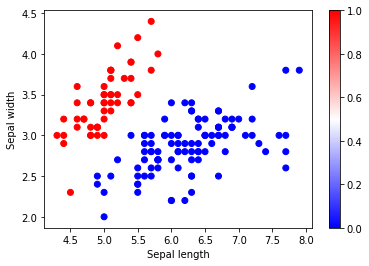

In [61]:
sc = scatter(iris_2['sepal_length'], iris_2['sepal_width'], c=y, cmap='bwr')
colorbar(sc)
xlabel('Sepal length')
ylabel('Sepal width')

#### split train&test

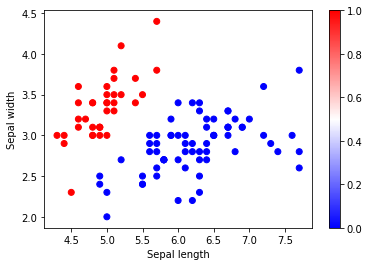

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
sc = scatter(X_train['sepal_length'], X_train['sepal_width'], c=y_train, cmap='bwr')
colorbar(sc)
xlabel('Sepal length')
ylabel('Sepal width')

In [63]:
from sklearn import neighbors
model = neighbors.KNeighborsClassifier(n_neighbors=15,
                                       weights='uniform',
                                       p=2)

In [64]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [65]:
print 'Predictions =', model.predict(X_train.iloc[0:5])

Predictions = [ 0.  1.  1.  1.  0.]


In [66]:
y_train[0:5]

array([ 0.,  1.,  1.,  1.,  0.])

In [67]:
from sklearn import metrics
prediction_on_training = model.predict(X_train)
print metrics.accuracy_score(y_train, prediction_on_training)

0.990476190476


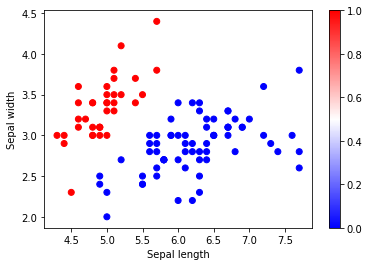

In [68]:
sc = scatter(X_train['sepal_length'], X_train['sepal_width'], c=y_train, cmap='bwr')
colorbar(sc)
xlabel('Sepal length')
ylabel('Sepal width')

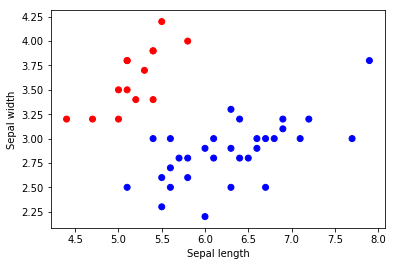

In [69]:
scatter(X_test['sepal_length'], X_test['sepal_width'], c=y_test, cmap='bwr')
xlabel('Sepal length')
ylabel('Sepal width')

In [70]:
predicted_classes = model.predict(X_test)
print metrics.accuracy_score(y_test, predicted_classes)

1.0


#### Cross Validation

In [72]:
from sklearn import model_selection

kfold = model_selection.StratifiedKFold(n_splits=3).split(X=X[:6], y=[0,0,0,1,1,1])

In [73]:
for train, holdout in kfold:
    print 'train indices =', train, 'holdout indices =', holdout

train indices = [1 2 4 5] holdout indices = [0 3]
train indices = [0 2 3 5] holdout indices = [1 4]
train indices = [0 1 3 4] holdout indices = [2 5]


In [74]:
def cv_accuracy_score(X, y, nn):
    """For each fold, fit the nearest neighbors model
    with nn nearest neighbors on the train, and return accuracy
    on the test."""
    
    model = neighbors.KNeighborsClassifier(n_neighbors=nn,
                                           weights='uniform')
    accuracies = []
    
    kfold = model_selection.StratifiedKFold(n_splits=3, shuffle=True).split(X, y)
    for train, holdout in kfold:
        # Select the training and testing data using the indices
        # provided by kfold
        X_train = X.iloc[train]
        X_holdout = X.iloc[holdout]
        y_train = y[train]
        y_holdout = y[holdout]
        
        # Fit the model
        model.fit(X_train, y_train)
        
        # Compute test accuracy
        accuracy = metrics.accuracy_score(y_holdout, model.predict(X_holdout))
        accuracies.append(accuracy)
    
    average_accuracy = sum(accuracies) * 1.0 / len(accuracies)
    return average_accuracy

In [75]:
cv_accuracy_score(X, y, nn=1)

0.99319727891156473

In [76]:
nn = [1] + [(x + 1) * 5 for x in range(19)]
print nn

[1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]


In [77]:
scores = [cv_accuracy_score(X, y, num_nbrs) for num_nbrs in nn]

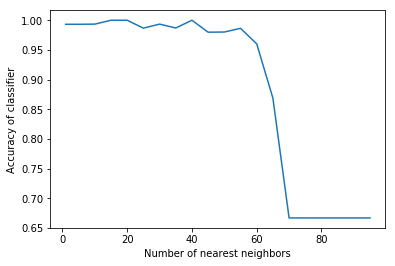

In [78]:
plot(nn, scores)
xlabel('Number of nearest neighbors')
ylabel('Accuracy of classifier')

## Naive Bayes

In [80]:
# We will ignore some silly warnings that pop up due to scikit-learn
import warnings
warnings.filterwarnings('ignore')

In [4]:
names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', \
         'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', \
         'hours_per_week', 'native_country', 'income_band']
df = pd.read_csv('/Users/meganchen/Desktop/UT Austin/MSBA/MIS_381/dataset/adult.data', sep=', ', names=names)
df[:5]

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_band
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [83]:
df['target'] = 0.0
import statsmodels.api as sm
from patsy import dmatrices

In [84]:
df['target'].value_counts()

0.0    24720
1.0     7841
Name: target, dtype: int64

In [8]:
df['age_binned'] = pd.qcut(df['age'], 5)
print df['age_binned'][:5]

0    (33.0, 41.0]
1    (41.0, 50.0]
2    (33.0, 41.0]
3    (50.0, 90.0]
4    (26.0, 33.0]
Name: age_binned, dtype: category
Categories (5, interval[float64]): [(16.999, 26.0] < (26.0, 33.0] < (33.0, 41.0] < (41.0, 50.0] < (50.0, 90.0]]


In [6]:
df['fnlwgt_binned'] = pd.qcut(df['fnlwgt'], 5)
df['education_num_binned'] = pd.qcut(df['education_num'], 3)
df['capital_loss_binned'] = '0'
df['capital_loss_binned'][df['capital_loss'] > 0] = '>0'
df['capital_gain_binned'] = '0'
df['capital_gain_binned'][df['capital_gain'] > 0] = '>0'
df['hours_binned'] = '40'
df['hours_binned'][df['hours_per_week'] < 40] = '<40'
df['hours_binned'][df['hours_per_week'] > 40] = '>40'


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on 

In [9]:
#For Naive Bayes ONLY!!!!

categorical_columns = ['age_binned', 'workclass', 'fnlwgt_binned', 'education',
          'education_num_binned', 'marital_status', 'occupation', 'relationship',
          'race', 'sex', 'capital_gain_binned', 'capital_loss_binned', 'hours_binned']
df_dummies = pd.get_dummies(df[categorical_columns],
                            prefix=categorical_columns,
                            columns=categorical_columns)
dummy_column_names = df_dummies.columns.values
dummy_column_names[:10]

array(['age_binned_(16.999, 26.0]', 'age_binned_(26.0, 33.0]',
       'age_binned_(33.0, 41.0]', 'age_binned_(41.0, 50.0]',
       'age_binned_(50.0, 90.0]', 'workclass_?', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private'], dtype=object)

In [10]:
df_dummies

,"age_binned_(16.999, 26.0]","age_binned_(26.0, 33.0]","age_binned_(33.0, 41.0]","age_binned_(41.0, 50.0]","age_binned_(50.0, 90.0]",workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,race_White,sex_Female,sex_Male,capital_gain_binned_0,capital_gain_binned_>0,capital_loss_binned_0,capital_loss_binned_>0,hours_binned_40,hours_binned_<40,hours_binned_>40
0,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,1,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,1,0,1,1,0,1,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,...,1,0,1,1,0,1,0,1,0,0
3,0,0,0,0,1,0,0,0,0,1,...,0,0,1,1,0,1,0,1,0,0
4,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,0,1,0,1,0,0
5,0,0,1,0,0,0,0,0,0,1,...,1,1,0,1,0,1,0,1,0,0
6,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,1,0,0,1,0
7,0,0,0,0,1,0,0,0,0,0,...,1,0,1,1,0,1,0,0,0,1
8,0,1,0,0,0,0,0,0,0,1,...,1,1,0,0,1,1,0,0,0,1
9,0,0,0,1,0,0,0,0,0,1,...,1,0,1,0,1,1,0,1,0,0


In [88]:
df2 = pd.concat([df, df_dummies], axis=1)

In [89]:
formula = 'target ~ 0 + {}'.format(' + '.join(['Q("{}")'.format(x) for x in dummy_column_names]))

In [90]:
Y, X = dmatrices(formula, df2, return_type='dataframe')

In [91]:
y = Y['target'].values

In [92]:
from sklearn import naive_bayes
model = naive_bayes.MultinomialNB()

In [93]:
model.fit(X,y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [94]:
print 'Prediction'
print model.predict(X[:10])
print 'Actual'
print y[:10]

Prediction
[ 0.  1.  0.  0.  1.  1.  0.  1.  1.  1.]
Actual
[ 0.  0.  0.  0.  0.  0.  0.  1.  1.  1.]


In [95]:
prediction_train = model.predict(X)
print metrics.accuracy_score(y, prediction_train)

0.818893768619


#### get test set

In [96]:
df_test = pd.read_csv('/Users/meganchen/Desktop/MIS_381/dataset/adult.test', sep=', ', names=names)

In [97]:
df_test['target'] = 0.0
mask = (df_test['income_band'] == '>50K')
df_test['target'][mask] = 1.0

In [98]:
df_test['age_binned'] = pd.qcut(df_test['age'], 5)
df_test['fnlwgt_binned'] = pd.qcut(df_test['fnlwgt'], 5)
df_test['education_num_binned'] = pd.qcut(df_test['education_num'], 3)

df_test['capital_loss_binned'] = '0'
df_test['capital_loss_binned'][df_test['capital_loss'] > 0] = '>0'

df_test['capital_gain_binned'] = '0'
df_test['capital_gain_binned'][df_test['capital_gain'] > 0] = '>0'

df_test['hours_binned'] = '40'
df_test['hours_binned'][df_test['hours_per_week'] < 40] = '<40'
df_test['hours_binned'][df_test['hours_per_week'] > 40] = '>40'
df_dummies = pd.get_dummies(df_test[categorical_columns],
                            prefix=categorical_columns,
                            columns=categorical_columns)
dummy_column_names = df_dummies.columns.values
df_test2 = pd.concat([df_test, df_dummies], axis=1)
formula = 'target ~ 0 + {}'.format(' + '.join(['Q("{}")'.format(x) for x in dummy_column_names]))

In [99]:
Y_test, X_test = dmatrices(formula, df_test2, return_type='dataframe')
y_test = Y_test['target'].values

In [100]:
prediction_test = model.predict(X_test)
print metrics.accuracy_score(y_test, prediction_test)

0.821632577851


#### Class Prior

In [101]:
print 'Prior probability for the negative class is',
print exp(model.class_log_prior_[0])
print 'Prior probability for the positive class is',
print exp(model.class_log_prior_[1])


Prior probability for the negative class is 0.759190442554
Prior probability for the positive class is 0.240809557446


In [102]:
df['target'].value_counts() / len(df)

0.0    0.75919
1.0    0.24081
Name: target, dtype: float64

In [103]:
model.feature_log_prob_[1][:5]

array([-6.35107198, -4.55837662, -3.87227007, -3.75926107, -3.88363922])

#### Likelihood

In [104]:
print 'Likelihoods for the negative class (first 5 features)'
print exp(model.feature_log_prob_[0])[:5]
print 'Likelihoods for the positive class (first 5 features)'
print np.exp(model.feature_log_prob_[1])[:5]

Likelihoods for the negative class (first 5 features)
[ 0.02183922  0.0152439   0.01444126  0.0118218   0.0135733 ]
Likelihoods for the positive class (first 5 features)
[ 0.00174488  0.01047906  0.02081107  0.02330095  0.02057581]


#### Importance

In [105]:
feature_importances = abs(model.feature_log_prob_[1] - model.feature_log_prob_[0])
feature_importances

array([ 2.5270243 ,  0.37480093,  0.36539552,  0.67854877,  0.41601179,
        1.00089736,  0.68648196,  0.27643082,  0.9317309 ,  0.12556119,
        1.3776994 ,  0.22839003,  0.16476499,  1.56033956,  0.03601936,
        0.09083016,  0.06662479,  0.07646216,  0.05127959,  1.47994405,
        1.75892163,  1.31989026,  2.00012941,  1.78112739,  1.54724608,
        1.71040025,  0.04285224,  0.10983809,  0.80348916,  2.19242717,
        0.51369456,  1.3747681 ,  2.80353307,  2.1604915 ,  0.30022494,
        0.75221789,  0.30022494,  0.87100125,  1.00169313,  0.90654859,
        0.9343262 ,  1.25018463,  1.88326713,  1.51453002,  1.21028715,
        1.00514108,  0.71251662,  0.35636675,  0.07890704,  1.0837754 ,
        0.87862107,  1.54489523,  0.7959203 ,  1.98304647,  3.16308848,
        0.94323488,  0.41979751,  0.15025213,  0.32588538,  0.23389987,
        0.9412969 ,  1.01482075,  2.06588812,  3.15037476,  1.5431454 ,
        1.04826572,  0.86177231,  0.13316036,  0.80626702,  1.10

In [106]:
feature_importance_series = Series(feature_importances, index=X.columns.values)
feature_importance_series[:10]

Q("age_binned_(16.999, 26.0]")    2.527024
Q("age_binned_(26.0, 33.0]")      0.374801
Q("age_binned_(33.0, 41.0]")      0.365396
Q("age_binned_(41.0, 50.0]")      0.678549
Q("age_binned_(50.0, 90.0]")      0.416012
Q("workclass_?")                  1.000897
Q("workclass_Federal-gov")        0.686482
Q("workclass_Local-gov")          0.276431
Q("workclass_Never-worked")       0.931731
Q("workclass_Private")            0.125561
dtype: float64

In [108]:
top_10_feature_indices = feature_importance_series.sort_values(ascending=False)[:10].index.values

In [109]:
inter_class_differences = model.feature_log_prob_[1] - model.feature_log_prob_[0]
new_feature_importance_series = Series(inter_class_differences, index=X.columns.values)

new_feature_importance_series[top_10_feature_indices]

Q("occupation_Priv-house-serv")     -3.163088
Q("relationship_Own-child")         -3.150375
Q("education_Preschool")            -2.803533
Q("age_binned_(16.999, 26.0]")      -2.527024
Q("education_Doctorate")             2.192427
Q("education_Prof-school")           2.160491
Q("relationship_Other-relative")    -2.065888
Q("education_1st-4th")              -2.000129
Q("occupation_Other-service")       -1.983046
Q("marital_status_Never-married")   -1.883267
dtype: float64

## Decision Trees

In [110]:
df = pd.read_csv('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.txt')
df.columns.values

array(['row.names', 'pclass', 'survived', 'name', 'age', 'embarked',
       'home.dest', 'room', 'ticket', 'boat', 'sex'], dtype=object)

In [111]:
df.iloc[0]

row.names                               1
pclass                                1st
survived                                1
name         Allen, Miss Elisabeth Walton
age                                    29
embarked                      Southampton
home.dest                    St Louis, MO
room                                  B-5
ticket                         24160 L221
boat                                    2
sex                                female
Name: 0, dtype: object

In [112]:
df['embarked'].value_counts()

Southampton    573
Cherbourg      203
Queenstown      45
Name: embarked, dtype: int64

In [113]:
Y, X = dmatrices('survived ~ 0 + pclass + age + embarked + sex', df, return_type='dataframe')
y = Y['survived'].values

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [115]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy')

In [116]:
result = model.fit(X_train, y_train)

In [117]:
from sklearn import metrics

prediction_train = model.predict(X_train)
print metrics.accuracy_score(y_train, prediction_train)

0.924657534247


In [118]:
prediction_test = model.predict(X_test)
print metrics.accuracy_score(y_test, prediction_test)

0.772486772487


In [119]:
model2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)
result = model2.fit(X_train, y_train)

In [120]:
prediction_train = model2.predict(X_train)
print metrics.accuracy_score(y_train, prediction_train)

0.828767123288


In [121]:
prediction = model2.predict(X_test)
print metrics.accuracy_score(y_test, prediction)

0.809523809524


In [130]:
dot_data = StringIO()
tree.export_graphviz(model2, out_file=dot_data, feature_names=X.columns.values)
pydot_ng.graph_from_dot_data(dot_data.getvalue()).write_png('/Users/meganchen/Desktop/MIS_381/dataset/titanic2.png')

True

In [131]:
names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', \
         'marital_status', 'occupation', 'relationship', 'race', 'sex', \
         'capital_gain', 'capital_loss', 'hours_per_week', \
         'native_country', 'income_band']
df = pd.read_table('/Users/meganchen/Desktop/MIS_381/dataset/adult.data', sep=', ', names=names)
df.iloc[0]

age                          39
workclass             State-gov
fnlwgt                    77516
education             Bachelors
education_num                13
marital_status    Never-married
occupation         Adm-clerical
relationship      Not-in-family
race                      White
sex                        Male
capital_gain               2174
capital_loss                  0
hours_per_week               40
native_country    United-States
income_band               <=50K
Name: 0, dtype: object

In [127]:
df['target'] = 0.0
mask = (df['income_band'] == '>50K')
df['target'][mask] = 1.0

In [128]:
formula = 'target ~ 0 + age + workclass + fnlwgt + education + education_num + ' + \
          'marital_status + occupation + relationship + race + sex + ' \
          'capital_gain + capital_loss + hours_per_week'
Y, X = dmatrices(formula, df, return_type='dataframe')
y = Y['target'].values

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#### Cross Validation

In [132]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Create the folds in the training data
kfold = StratifiedKFold(n_splits=3, shuffle=True)

# Iterate over max_depth
for max_depth in [1, 2, 3, 4, 5]:
    model3 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    scores = cross_val_score(model3, X_train, y_train, cv=kfold)
    print 'max_depth={} scores={} avg_score={}'.format(max_depth, scores, scores.mean())

max_depth=1 scores=[ 0.75335615  0.75332368  0.75332368] avg_score=0.753334502385
max_depth=2 scores=[ 0.82574362  0.82585231  0.82335132] avg_score=0.824982416585
max_depth=3 scores=[ 0.84443275  0.84033171  0.84098986] avg_score=0.841918106588
max_depth=4 scores=[ 0.84245854  0.84467553  0.83835725] avg_score=0.841830439272
max_depth=5 scores=[ 0.84114241  0.84428064  0.85138871] avg_score=0.845603916353


In [134]:
model3 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
model3.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [135]:
prediction_train = model3.predict(X_train)
print metrics.accuracy_score(y_train, prediction_train)

0.841874341874


In [136]:
prediction = model3.predict(X_test)
print metrics.accuracy_score(y_test, prediction)

0.848193264408


## Ensemble

In [139]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [141]:
names = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
         'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail',
         'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses',
         'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
         'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl',
         'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
         'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology',
         'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs',
         'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu',
         'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
         'char_freq_$', 'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest',
         'capital_run_length_total', 'is_spam']
df = pd.read_csv('/Users/meganchen/Desktop/MIS_381/dataset/spambase.csv', header=None, names=names)

In [142]:
formula = 'is_spam ~ ' + ' + '.join(['Q("'+x+'")' for x in df.columns.values[:-1]])

The Q() function stands for quoting, and is necessary when you have features like char_freq_(, in which the parenthesis throws off the dmatrices() function. Q("char_freq_(") tells Python to consider the entire thing as a string.

In [143]:
Y, X = dmatrices(formula, df, return_type='dataframe')
y = Y['is_spam'].values

In [144]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [145]:
model_list = [('Decision Tree', tree.DecisionTreeClassifier(criterion='entropy')),
              ('Bagging', BaggingClassifier(tree.DecisionTreeClassifier(criterion='entropy'), random_state=1)),
              ('Random Forest', RandomForestClassifier(n_estimators=10, random_state=1)),
              ('Gradient Boosting', GradientBoostingClassifier(n_estimators=200, max_depth=4, random_state=1))]

In [146]:
for (name, model) in model_list:
    print 'Fitting', name
    model.fit(X_train, y_train)

Fitting Decision Tree
Fitting Bagging
Fitting Random Forest
Fitting Gradient Boosting


In [148]:
from sklearn import metrics

accuracy_train = {}
accuracy_test = {}
for (name, model) in model_list:
    prediction_train = model.predict(X_train)
    accuracy_train[name] = metrics.accuracy_score(y_train, prediction_train)
    prediction_test = model.predict(X_test)
    accuracy_test[name] = metrics.accuracy_score(y_test, prediction_test)
    
df = DataFrame({'Training Accuracy':accuracy_train, 'Test Accuracy':accuracy_test})
df

,Test Accuracy,Training Accuracy
Bagging,0.947864,0.995963
Decision Tree,0.919623,0.999689
Gradient Boosting,0.955105,0.988509
Random Forest,0.946416,0.995963


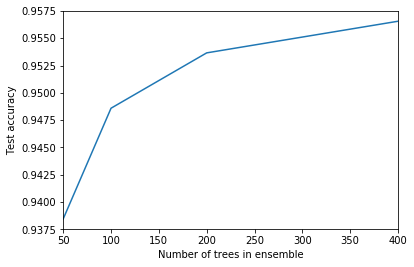

In [149]:
scores = {}
for num_trees in [50, 100, 200, 300, 400]:
    model = GradientBoostingClassifier(n_estimators=num_trees, max_depth=2, random_state=1)
    model.fit(X_train, y_train)
    prediction_test = model.predict(X_test)
    accuracy_test = metrics.accuracy_score(y_test, prediction_test)
    scores[num_trees] = accuracy_test
Series(scores).sort_index().plot()
xlabel('Number of trees in ensemble')
ylabel('Test accuracy')

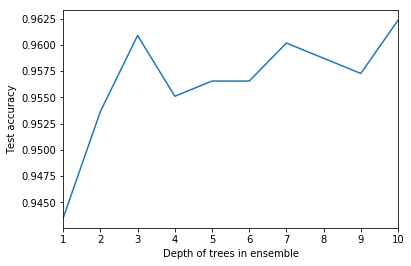

In [150]:
scores = {}
for depth in range(1, 11):
    model = GradientBoostingClassifier(n_estimators=200, max_depth=depth, random_state=1)
    model.fit(X_train, y_train)
    prediction_test = model.predict(X_test)
    accuracy_test = metrics.accuracy_score(y_test, prediction_test)
    scores[depth] = accuracy_test
Series(scores).sort_index().plot()
xlabel('Depth of trees in ensemble')
ylabel('Test accuracy')